In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [6]:
plt.rcParams.update({'font.size':22})

In [81]:
style = {"dark":"dashed","hydro":"solid"}
palette = { "dark":"#044751","hydro": "#B6DAFF", 
           "Illustris":"#668AFF","TNG": "#B6DAFF", # "TNG": "#7B55F3"
           "Illustris dark": "#009292", "Illustris hydro": "#B6DAFF",
           "TNG dark": "#930200", "TNG hydro": "#FFB5DC",
           "Minor Pairs":'#FFB201',"Minor Plus Pairs":"#FF6300",
           "Extra":"#DE2280","Stellar":"#0A68DD",
           "Halo":"#4B0094","Max Halo":"#FF6BB7"}
alphaVal = {"Major":0.7,"Minor":0.4}

In [8]:
f = h5py.File("../data/pairs/Illustris_135_1pair.hdf5","r")
g = h5py.File("../data/pairs/TNG_99_1pair.hdf5","r")

## Unpack values into dictionary for faster plotting!

In [12]:
Illustris, TNG = {}, {}
for key in f.keys():
    Illustris[key], TNG[key] = {}, {}
    for subkey in f[key].keys():
        Illustris[key][subkey], TNG[key][subkey] = {}, {}
        for subsubkey, val in f[key][subkey].items():
            Illustris[key][subkey][subsubkey] = np.array(val)
        for subsubkey, val in g[key][subkey].items():
            TNG[key][subkey][subsubkey] = np.array(val)


In [19]:
Illustris

{'Header': {},
 'dark': {'dwarf': {'Group ID': array([ 1432,  1499,  1785, ..., 20494, 20511, 20710], dtype=int32),
   'Group Mass': array([44.91722313, 44.60360516, 37.14071621, ...,  8.05477595,
           8.01491602,  8.0472556 ]),
   'Group Nsubs': array([27, 17, 26, ...,  2,  2,  2]),
   'Group Radius': array([200.06791028, 199.60086996, 187.78538704, ..., 112.81847954,
          112.6371297 , 112.78951168]),
   'RelVel': array([126.37055493, 102.24704708, 205.9874027 , ...,  85.73578747,
           67.43062863,  55.47082336]),
   'Separation': array([457.67030738, 663.98107944, 684.16719358, ...,  33.49363821,
           91.46807733,  58.67834326]),
   'Stellar Mass Ratio': array([3.22080521e-01, 6.70065079e-01, 3.64371475e-01, ...,
          1.98559289e-02, 1.72740998e-04, 1.82524629e-03]),
   'Sub1 ID': array([572970, 577347, 594229, ..., 835963, 836037, 837088]),
   'Sub1 Mass': array([35.95844724, 33.20884163, 32.18225187, ...,  6.83565438,
           7.3989623 ,  7.25005093]

# Relvel vs. Sep scatter

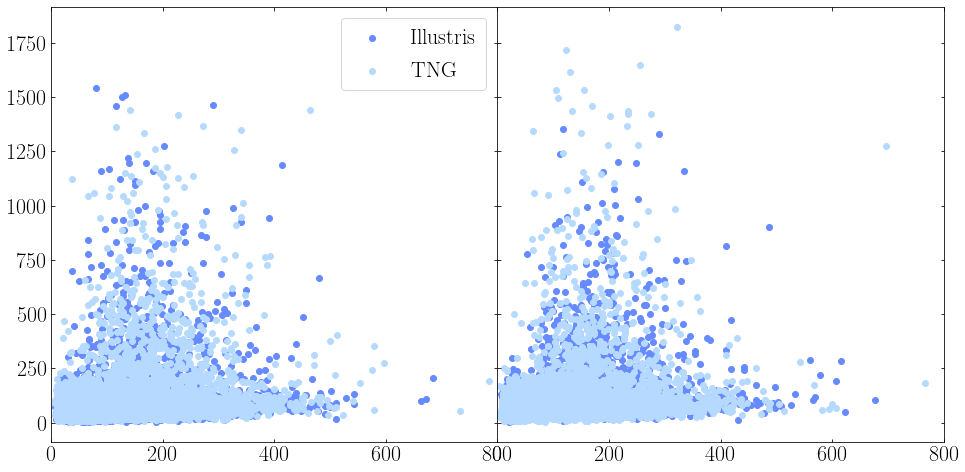

In [82]:
fig,ax = plt.subplots(1,2,figsize=(16,8),sharey=True)
plt.subplots_adjust(wspace=0)

simNames = ["Illustris", "TNG"]
for ind, sim in enumerate([Illustris, TNG]):
    
    ax[0].scatter(sim['dark']['dwarf']["Separation"], sim['dark']['dwarf']["RelVel"],label=simNames[ind],color=palette[simNames[ind]])
    ax[1].scatter(sim['hydro']['dwarf']["Separation"], sim['hydro']['dwarf']["RelVel"],label=simNames[ind],color=palette[simNames[ind]])

for i in ax:
    i.set_xlim(0,800)
    
ax[0].legend()
plt.show()


# Illustris vs. TNG

## Dwarfs

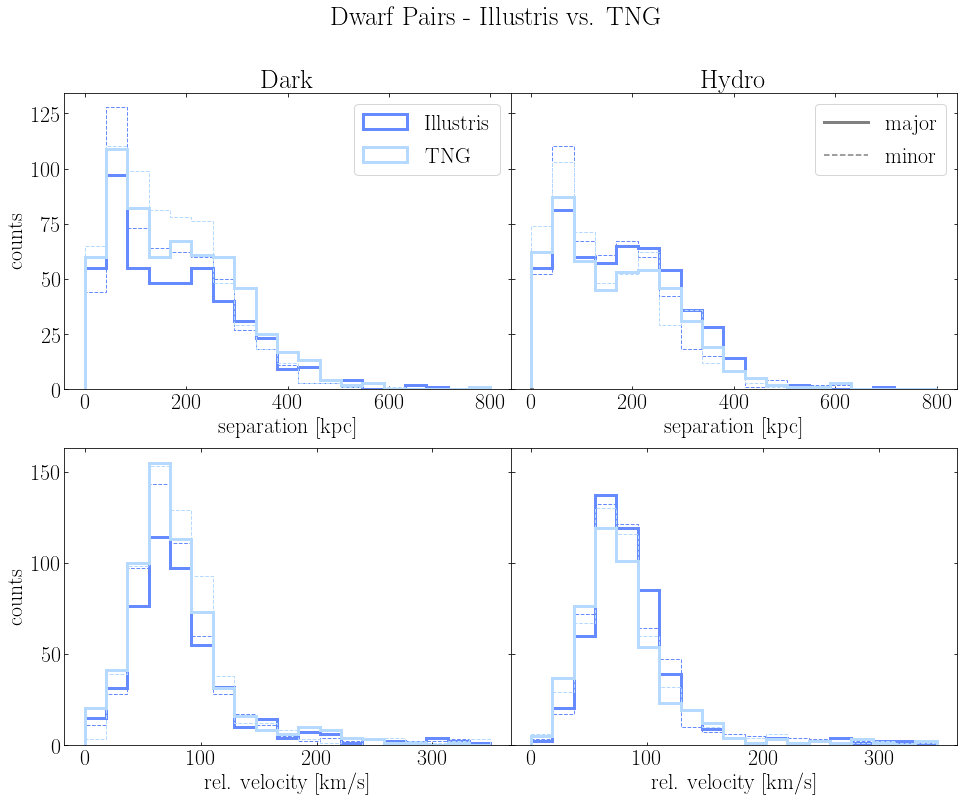

In [159]:
fig,ax = plt.subplots(2,2,figsize=(16,12),sharey='row')
plt.subplots_adjust(wspace=0)
# plt.subplots_adjust(hspace=1)

simNames = ["Illustris", "TNG"]
for ind, sim in enumerate([Illustris, TNG]):
    for sind, phys in enumerate(["dark","hydro"]):
        prim = sim[phys]['dwarf']["Stellar Mass Ratio"] < 1
        big = sim[phys]['dwarf']["Stellar Mass Ratio"] > 1/4
        small = sim[phys]['dwarf']["Stellar Mass Ratio"] > 1/10
        major = prim & big
        minor = prim & small & ~big
        
        ax[0][sind].hist(sim[phys]['dwarf']["Separation"][major], 
                 bins=np.linspace(0,800,20),
                 color=palette[simNames[ind]],
                 label= simNames[ind] if phys=="dark" else None,
                 histtype="step",
                 linestyle="solid",
#                  weights=np.ones(len(sim[phys]['dwarf']["Separation"][major]))/len(sim[phys]['dwarf']["Separation"][major]),
                 lw=3)
        ax[0][sind].hist(sim[phys]['dwarf']["Separation"][minor], 
                 bins=np.linspace(0,800,20),
                 color=palette[simNames[ind]],
                 histtype="step",
                 linestyle="dashed",
                 lw=1)
        
        ax[1][sind].hist(sim[phys]['dwarf']["RelVel"][major], 
                 bins=np.linspace(0,350,20),
                 color=palette[simNames[ind]],
#                  label=simNames[ind],
                 histtype="step",
                 linestyle="solid",
                 lw=3)
        ax[1][sind].hist(sim[phys]['dwarf']["RelVel"][minor], 
                 bins=np.linspace(0,350,20),
                 color=palette[simNames[ind]],
                 histtype="step",
                 linestyle="dashed",
                 lw=1)
        
#         ax[sind].scatter(sim[phys]['dwarf']["Separation"][major], sim[phys]['dwarf']["RelVel"][major],label=simNames[ind],color=palette[simNames[ind]])

ax[0][1].plot([0,0],color='grey', linestyle="solid", label='major',lw=3)
ax[0][1].plot([0,0],color='grey', linestyle="dashed", label='minor')

for i in ax:
    i[0].set_ylabel("counts")

ax[0][0].legend()
ax[0][1].legend()
ax[0][0].set_xlabel("separation [kpc]")
ax[0][1].set_xlabel("separation [kpc]")
ax[1][0].set_xlabel("rel. velocity [km/s]")
ax[1][1].set_xlabel("rel. velocity [km/s]")
ax[0][0].set_title("Dark")
ax[0][1].set_title("Hydro")

fig.suptitle("Dwarf Pairs - Illustris vs. TNG")
    
plt.show()


## Massive

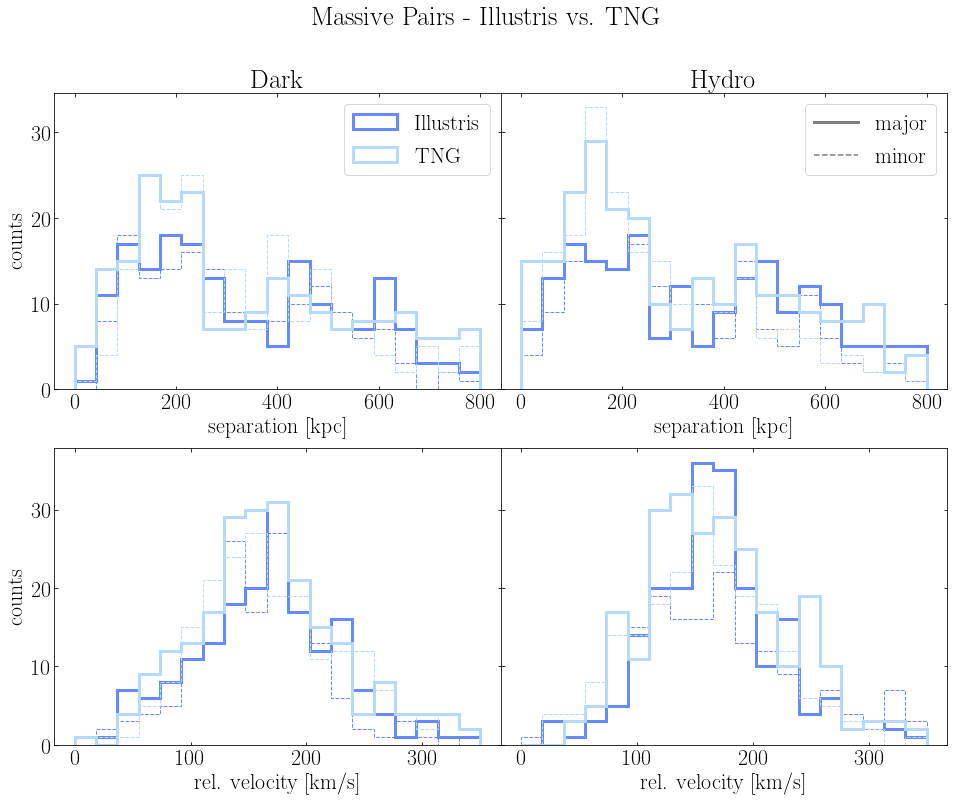

In [161]:
fig,ax = plt.subplots(2,2,figsize=(16,12),sharey='row')
plt.subplots_adjust(wspace=0)
# plt.subplots_adjust(hspace=1)

simNames = ["Illustris", "TNG"]
for ind, sim in enumerate([Illustris, TNG]):
    for sind, phys in enumerate(["dark","hydro"]):
        prim = sim[phys]['massive']["Stellar Mass Ratio"] < 1
        big = sim[phys]['massive']["Stellar Mass Ratio"] > 1/4
        small = sim[phys]['massive']["Stellar Mass Ratio"] > 1/10
        major = prim & big
        minor = prim & small & ~big
        
        ax[0][sind].hist(sim[phys]['massive']["Separation"][major], 
                 bins=np.linspace(0,800,20),
                 color=palette[simNames[ind]],
                 label= simNames[ind] if phys=="dark" else None,
                 histtype="step",
                 linestyle="solid",
#                  weights=np.ones(len(sim[phys]['dwarf']["Separation"][major]))/len(sim[phys]['dwarf']["Separation"][major]),
                 lw=3)
        ax[0][sind].hist(sim[phys]['massive']["Separation"][minor], 
                 bins=np.linspace(0,800,20),
                 color=palette[simNames[ind]],
                 histtype="step",
                 linestyle="dashed",
                 lw=1)
        
        ax[1][sind].hist(sim[phys]['massive']["RelVel"][major], 
                 bins=np.linspace(0,350,20),
                 color=palette[simNames[ind]],
#                  label=simNames[ind],
                 histtype="step",
                 linestyle="solid",
                 lw=3)
        ax[1][sind].hist(sim[phys]['massive']["RelVel"][minor], 
                 bins=np.linspace(0,350,20),
                 color=palette[simNames[ind]],
                 histtype="step",
                 linestyle="dashed",
                 lw=1)
        
#         ax[sind].scatter(sim[phys]['dwarf']["Separation"][major], sim[phys]['dwarf']["RelVel"][major],label=simNames[ind],color=palette[simNames[ind]])

ax[0][1].plot([0,0],color='grey', linestyle="solid", label='major',lw=3)
ax[0][1].plot([0,0],color='grey', linestyle="dashed", label='minor')

for i in ax:
    i[0].set_ylabel("counts")

ax[0][0].legend()
ax[0][1].legend()
ax[0][0].set_xlabel("separation [kpc]")
ax[0][1].set_xlabel("separation [kpc]")
ax[1][0].set_xlabel("rel. velocity [km/s]")
ax[1][1].set_xlabel("rel. velocity [km/s]")
ax[0][0].set_title("Dark")
ax[0][1].set_title("Hydro")

fig.suptitle("Massive Pairs - Illustris vs. TNG")
    
plt.show()


# Dark vs. Hydro

## Dwarfs

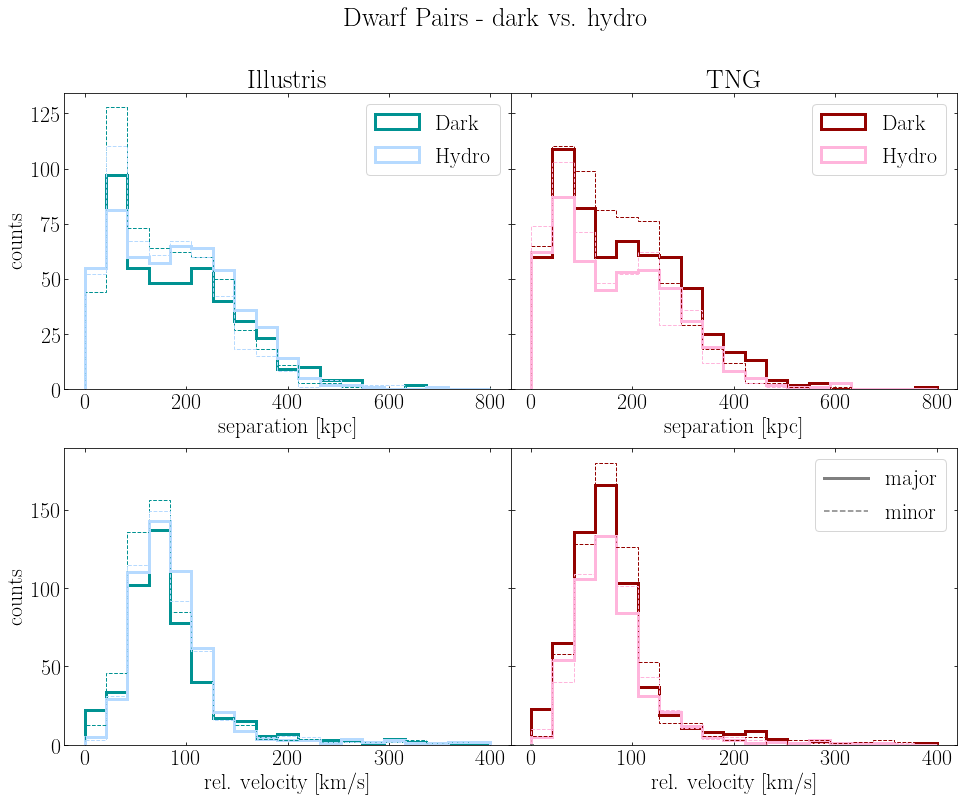

In [157]:
fig,ax = plt.subplots(2,2,figsize=(16,12),sharey='row')
plt.subplots_adjust(wspace=0)
# plt.subplots_adjust(hspace=1)

simname = ["Illustris","TNG"]
for simIND, sim in enumerate([Illustris,TNG]):

    prim = sim["dark"]['dwarf']["Stellar Mass Ratio"] < 1
    big = sim["dark"]['dwarf']["Stellar Mass Ratio"] > 1/4
    small = sim["dark"]['dwarf']["Stellar Mass Ratio"] > 1/10
    major = prim & big
    minor = prim & small & ~big

    primH = sim["hydro"]['dwarf']["Stellar Mass Ratio"] < 1
    bigH = sim["hydro"]['dwarf']["Stellar Mass Ratio"] > 1/4
    smallH = sim["hydro"]['dwarf']["Stellar Mass Ratio"] > 1/10
    majorH = primH & bigH
    minorH = primH & smallH & ~bigH

    ax[0][simIND].hist(sim["dark"]['dwarf']["Separation"][major], 
             bins=np.linspace(0,800,20),
             color=palette[simname[simIND]+" dark"],
             label= "Dark",
             histtype="step",
             linestyle="solid",
             lw=3)

    ax[0][simIND].hist(sim["hydro"]['dwarf']["Separation"][majorH], 
             bins=np.linspace(0,800,20),
             color=palette[simname[simIND]+" hydro"],
             label= "Hydro",
             histtype="step",
             linestyle="solid",
             lw=3) 

    ax[0][simIND].hist(sim["dark"]['dwarf']["Separation"][minor], 
             bins=np.linspace(0,800,20),
             color=palette[simname[simIND]+" dark"],
             histtype="step",
             linestyle="dashed")

    ax[0][simIND].hist(sim["hydro"]['dwarf']["Separation"][minorH], 
             bins=np.linspace(0,800,20),
             color=palette[simname[simIND]+" hydro"],
             histtype="step",
             linestyle="dashed") 
    
    # ---
    
    ax[1][simIND].hist(sim["dark"]['dwarf']["RelVel"][major], 
             bins=np.linspace(0,400,20),
             color=palette[simname[simIND]+" dark"],
             label= "Dark" if simIND == 0 else None,
             histtype="step",
             linestyle="solid",
             lw=3)

    ax[1][simIND].hist(sim["hydro"]['dwarf']["RelVel"][majorH], 
             bins=np.linspace(0,400,20),
             color=palette[simname[simIND]+" hydro"],
             label= "Hydro" if simIND == 0 else None,
             histtype="step",
             linestyle="solid",
             lw=3) 

    ax[1][simIND].hist(sim["dark"]['dwarf']["RelVel"][minor], 
             bins=np.linspace(0,400,20),
             color=palette[simname[simIND]+" dark"],
             histtype="step",
             linestyle="dashed")

    ax[1][simIND].hist(sim["hydro"]['dwarf']["RelVel"][minorH], 
             bins=np.linspace(0,400,20),
             color=palette[simname[simIND]+" hydro"],
             histtype="step",
             linestyle="dashed") 

ax[1][1].plot([0,0],color='grey', linestyle="solid", label='major',lw=3)
ax[1][1].plot([0,0],color='grey', linestyle="dashed", label='minor')

for i in ax:
    i[0].set_ylabel("counts")

ax[0][0].legend()
ax[0][1].legend()
ax[1][1].legend()
ax[0][0].set_xlabel("separation [kpc]")
ax[0][1].set_xlabel("separation [kpc]")
ax[1][0].set_xlabel("rel. velocity [km/s]")
ax[1][1].set_xlabel("rel. velocity [km/s]")
ax[0][0].set_title("Illustris")
ax[0][1].set_title("TNG")

fig.suptitle("Dwarf Pairs - dark vs. hydro")
    
plt.show()


## Massive

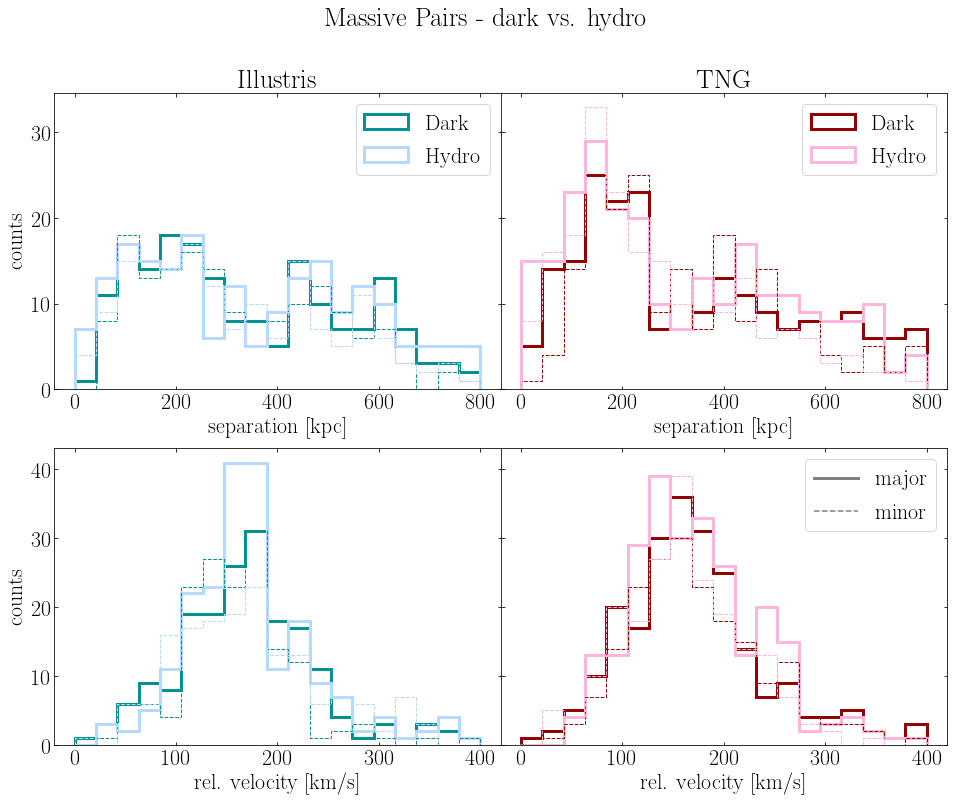

In [158]:
fig,ax = plt.subplots(2,2,figsize=(16,12),sharey='row')
plt.subplots_adjust(wspace=0)
# plt.subplots_adjust(hspace=1)

simname = ["Illustris","TNG"]
for simIND, sim in enumerate([Illustris,TNG]):

    prim = sim["dark"]['massive']["Stellar Mass Ratio"] < 1
    big = sim["dark"]['massive']["Stellar Mass Ratio"] > 1/4
    small = sim["dark"]['massive']["Stellar Mass Ratio"] > 1/10
    major = prim & big
    minor = prim & small & ~big

    primH = sim["hydro"]['massive']["Stellar Mass Ratio"] < 1
    bigH = sim["hydro"]['massive']["Stellar Mass Ratio"] > 1/4
    smallH = sim["hydro"]['massive']["Stellar Mass Ratio"] > 1/10
    majorH = primH & bigH
    minorH = primH & smallH & ~bigH

    ax[0][simIND].hist(sim["dark"]['massive']["Separation"][major], 
             bins=np.linspace(0,800,20),
             color=palette[simname[simIND]+" dark"],
             label= "Dark",
             histtype="step",
             linestyle="solid",
             lw=3)

    ax[0][simIND].hist(sim["hydro"]['massive']["Separation"][majorH], 
             bins=np.linspace(0,800,20),
             color=palette[simname[simIND]+" hydro"],
             label= "Hydro",
             histtype="step",
             linestyle="solid",
             lw=3) 

    ax[0][simIND].hist(sim["dark"]['massive']["Separation"][minor], 
             bins=np.linspace(0,800,20),
             color=palette[simname[simIND]+" dark"],
             histtype="step",
             linestyle="dashed")

    ax[0][simIND].hist(sim["hydro"]['massive']["Separation"][minorH], 
             bins=np.linspace(0,800,20),
             color=palette[simname[simIND]+" hydro"],
             histtype="step",
             linestyle="dashed") 
    
    # ---
    
    ax[1][simIND].hist(sim["dark"]['massive']["RelVel"][major], 
             bins=np.linspace(0,400,20),
             color=palette[simname[simIND]+" dark"],
             label= "Dark" if simIND == 0 else None,
             histtype="step",
             linestyle="solid",
             lw=3)

    ax[1][simIND].hist(sim["hydro"]['massive']["RelVel"][majorH], 
             bins=np.linspace(0,400,20),
             color=palette[simname[simIND]+" hydro"],
             label= "Hydro" if simIND == 0 else None,
             histtype="step",
             linestyle="solid",
             lw=3) 

    ax[1][simIND].hist(sim["dark"]['massive']["RelVel"][minor], 
             bins=np.linspace(0,400,20),
             color=palette[simname[simIND]+" dark"],
             histtype="step",
             linestyle="dashed")

    ax[1][simIND].hist(sim["hydro"]['massive']["RelVel"][minorH], 
             bins=np.linspace(0,400,20),
             color=palette[simname[simIND]+" hydro"],
             histtype="step",
             linestyle="dashed") 

ax[1][1].plot([0,0],color='grey', linestyle="solid", label='major',lw=3)
ax[1][1].plot([0,0],color='grey', linestyle="dashed", label='minor')

for i in ax:
    i[0].set_ylabel("counts")

ax[0][0].legend()
ax[0][1].legend()
ax[1][1].legend()
ax[0][0].set_xlabel("separation [kpc]")
ax[0][1].set_xlabel("separation [kpc]")
ax[1][0].set_xlabel("rel. velocity [km/s]")
ax[1][1].set_xlabel("rel. velocity [km/s]")
ax[0][0].set_title("Illustris")
ax[0][1].set_title("TNG")

fig.suptitle("Massive Pairs - dark vs. hydro")
    
plt.show()


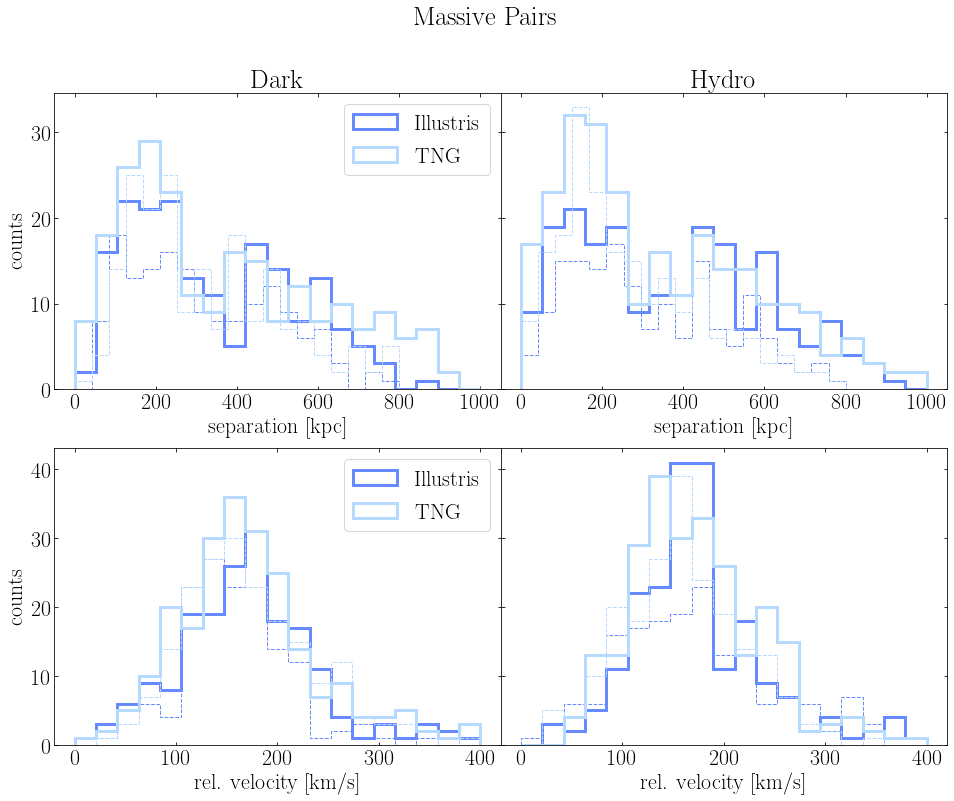

In [90]:
fig,ax = plt.subplots(2,2,figsize=(16,12),sharey='row')
plt.subplots_adjust(wspace=0)
# plt.subplots_adjust(hspace=1)

simNames = ["Illustris", "TNG"]
for ind, sim in enumerate([Illustris, TNG]):
    for sind, phys in enumerate(["dark","hydro"]):
        prim = sim[phys]['massive']["Stellar Mass Ratio"] < 1
        big = sim[phys]['massive']["Stellar Mass Ratio"] > 1/4
        small = sim[phys]['massive']["Stellar Mass Ratio"] > 1/10
        major = prim & big
        minor = prim & small & ~big
        
        ax[0][sind].hist(sim[phys]['massive']["Separation"][major], 
                 bins=np.linspace(0,1000,20),
                 color=palette[simNames[ind]],
                 label=simNames[ind],
                 histtype="step",
                 linestyle="solid",
#                  weights=np.ones(len(sim[phys]['dwarf']["Separation"][major]))/len(sim[phys]['dwarf']["Separation"][major]),
                 lw=3)
        ax[0][sind].hist(sim[phys]['massive']["Separation"][minor], 
                 bins=np.linspace(0,800,20),
                 color=palette[simNames[ind]],
                 histtype="step",
                 linestyle="dashed",
                 lw=1)
        
        ax[1][sind].hist(sim[phys]['massive']["RelVel"][major], 
                 bins=np.linspace(0,30,20),
                 color=palette[simNames[ind]],
                 label=simNames[ind],
                 histtype="step",
                 linestyle="solid",
                 lw=3)
        ax[1][sind].hist(sim[phys]['massive']["RelVel"][minor], 
                 bins=np.linspace(0,30,20),
                 color=palette[simNames[ind]],
                 histtype="step",
                 linestyle="dashed",
                 lw=1)
        
#         ax[sind].scatter(sim[phys]['dwarf']["Separation"][major], sim[phys]['dwarf']["RelVel"][major],label=simNames[ind],color=palette[simNames[ind]])

for i in ax:
    i[0].set_ylabel("counts")
    i[0].legend()

ax[0][0].set_xlabel("separation [kpc]")
ax[0][1].set_xlabel("separation [kpc]")
ax[1][0].set_xlabel("rel. velocity [km/s]")
ax[1][1].set_xlabel("rel. velocity [km/s]")
ax[0][0].set_title("Dark")
ax[0][1].set_title("Hydro")

fig.suptitle("Massive")
    
plt.show()
